In [11]:
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from os.path import join, basename
import datetime
from matplotlib.ticker import LogLocator, FixedLocator, FixedFormatter, MultipleLocator, AutoMinorLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.dates as mdates

In [8]:
def get_dates():
    start_time = datetime.datetime(2022, 7, 31, 6, 0, 0)
    end_time = datetime.datetime(2022, 8, 19, 18, 0, 0)

    delta = datetime.timedelta(hours=1)

    dates = []
    current = start_time
    while current < end_time:
        dates.append(current)
        current += delta
    return dates

In [3]:
YD190_dvov_file = "../output/scorr_dvov/YD/YD190/YD.YD190.dvov.npz"
dvov_dat = np.load(YD190_dvov_file)

In [9]:
Dvovs = dvov_dat['Dvovs']
Dvovs = Dvovs.T
mean_dvov = dvov_dat['mean_dvov']
freqs = dvov_dat['freqs']
dates = get_dates()

Text(0.5, 0, 'Month/Day 2022')

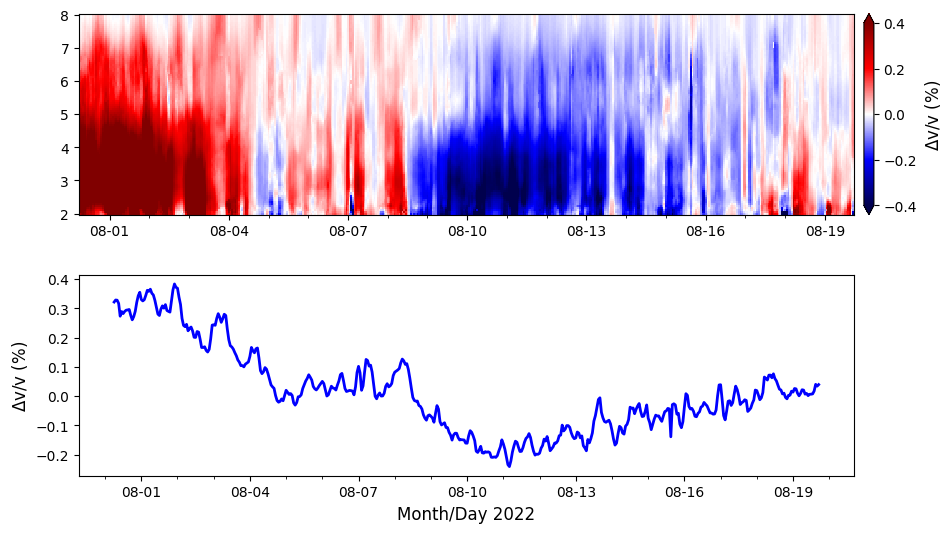

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6))
fig.subplots_adjust(hspace=0.3)
ax1 = ax[0]
dvov = ax1.pcolormesh(dates, freqs, Dvovs*100, cmap="seismic")
dvov.set_clim(-0.4, 0.4)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax1.xaxis.set_minor_locator(AutoMinorLocator(3))
pos = ax1.get_position()
cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.01, pos.height])
cbar = plt.colorbar(dvov, cax=cbar_ax, extend='both')
cbar.set_ticks(np.arange(-0.4, 0.41, 0.2))
cbar.set_label(r"$\Delta$v/v (%)", fontsize=12)

ax2 = ax[1]
ax2.plot(dates, mean_dvov*100, lw=2, color="blue")
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax2.xaxis.set_minor_locator(AutoMinorLocator(3))
ax2.set_ylabel(r"$\Delta$v/v (%)", fontsize=12)
ax2.set_xlabel(r"Month/Day 2022", fontsize=12)
